In [57]:
# import required libraries
import pandahouse
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [15]:
# define connection parameters
connection = {
    'host': 'https://clickhouse.lab.karpov.courses',
    'password': 'dpo_python_2020',
    'user': 'student',
    'database': 'simulator_20230120'
}

In [27]:
#send the query and save the result to dataframe
q = """
SELECT user_id,
        countIf(action, action = 'view') AS views,
        countIf(action, action = 'like') AS likes,
        likes/views AS ctr,
        any(exp_group) AS exp_group
FROM simulator_20230120.feed_actions
WHERE toDate(time) >= '2022-12-25' 
AND toDate(time) <= '2022-12-31'
GROUP BY user_id
"""

df = pandahouse.read_clickhouse(q, connection=connection)

In [28]:
df.head()

,user_id,views,likes,ctr,exp_group
0,13289,55,7,0.127273,3
1,121096,101,29,0.287129,3
2,5090,66,25,0.378788,4
3,129283,17,2,0.117647,1
4,129995,152,36,0.236842,1


In [23]:
#number of AA-tests
n = 10000

In [76]:
stat_results = []
p_results = []
for i in range(n):
    A1 = np.random.choice(df[df.exp_group == 2].ctr, 500, replace=False)
    A2 = np.random.choice(df[df.exp_group == 3].ctr, 500, replace=False)
    [statistic, p_value] = stats.ttest_ind(A1, A2, equal_var=False)
    stat_results.append(statistic)
    p_results.append(p_value)

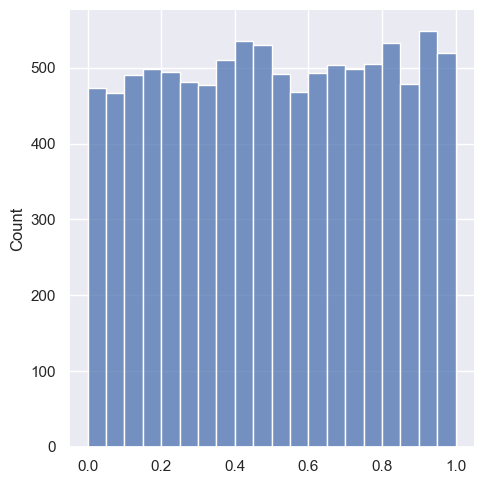

In [86]:
sns.displot(p_results, binwidth=0.05)

In [124]:
# the percentage of p-values less or equal to 0.05
(np.array(p_results) <= 0.05).sum() / len(p_results) * 100

4.73

# Conclusion
The distribution of the p-value is uniform.  
In an A/A t-test that satisfies the underlying statistical assumptions for a t-test, the resulting p-value distribution should be uniform (so, a p-value < 0.05 should occur 5% of the time). If the p-value distribution is not uniform, it shows that the testing methodology is flawed and violates assumptions.  
  
The calculation shows that a p-value < 0.05 occurs less than 5% of the time, which means that the split system works correctly.